__data pre-processing.ipynb__ 에서 "digitalTwin_data.log" 를 정제한 __"band_df.pkl"__ , __"tag_df.pkl"__ 활용하여 EDA

##### Library

In [1]:
import pandas as pd
import json
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
sns.set_style("whitegrid")

import datetime

import warnings
warnings.filterwarnings("ignore")

# env
- 환경 데이터

- 1. 온도 : temp
- 2. 습도 : hum
- 3. 이산화탄소 : co2
- 4. 휘발성유기화합물 : voc
- 5. 미세먼지농도1 : dust1
- 6. 초미세먼지농도2.5 , dust2_5
- 7. 초미세먼지농도10 : dust10

 # band 
- band_df에서 d 열은, [운동모드, 운동타입, 심박수, 걸음수, 칼로리 , 거리, 수면상태지수 , 수면시간, 착용상태, 상태지수, 신호 세기]
- tag_df에서 d 열은 신호세기를 나타냄

- 운동모드 : mode
- 운동타입 : type
- 심박수 : hr (heart rate)
- 걸음수 : walk
- 칼로리 : kcal
- 거리 : dist
- 수면상태지수 : sl_idx
- 수면시간 : sl_time
- 착용상태 : wear
- 상태지수 : st_idx
- 신호세기 : signal


- id : 어린이 band 고유 id
- bid : 게이트웨이 id

##### data load

In [2]:
band_df = pd.read_pickle('band_df.pkl')
tag_df = pd.read_pickle('tag_df.pkl')

print('#### Band 데이터 프레임 ####')
display(band_df.tail(3))

print('#### Tag 데이터 프레임 ####')
display(tag_df.tail(3))

#### Band 데이터 프레임 ####


,id,type,dt,bid,temp,hum,co2,voc,dust1,dust2_5,...,hr,walk,kcal,dist,sl_idx,sl_time,wear,st_idx,signal,hour
438940,cb:d7:d9:4a:31:4f,b,2020-07-22 00:02:42,24:0A:C4:4E:A9:10,29.9,58.6,736,93,10,10,...,0,0,0,0,0,0,1,100,-76,0
438941,ec:50:2e:b5:cf:c4,b,2020-07-22 00:02:42,24:0A:C4:4E:A9:10,29.9,58.6,736,93,10,10,...,0,0,0,0,0,0,1,0,-71,0
438942,ea:92:a1:d3:24:ed,b,2020-07-22 00:02:42,24:0A:C4:4E:A9:10,29.9,58.6,736,93,10,10,...,0,0,0,0,0,0,1,0,-63,0


#### Tag 데이터 프레임 ####


,id,type,d,dt,bid,temp,hum,co2,voc,dust1,dust2_5,dust10,hour
1621201,02:11:23:34:5b:cc,t,-68,2020-07-22 00:02:42,24:0A:C4:4E:A9:10,29.9,58.6,736,93,10,10,10,0
1621202,02:11:23:34:5b:b7,t,-69,2020-07-22 00:02:42,24:0A:C4:4E:A9:10,29.9,58.6,736,93,10,10,10,0
1621203,dd:34:01:02:f9:3e,t,-93,2020-07-22 00:02:43,24:0A:C4:4E:A8:B8,29.9,58.6,736,95,9,9,9,0


In [3]:
band_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438943 entries, 0 to 438942
Data columns (total 22 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   id       438943 non-null  object        
 1   type     438943 non-null  object        
 2   dt       438943 non-null  datetime64[ns]
 3   bid      438943 non-null  object        
 4   temp     438943 non-null  float64       
 5   hum      438943 non-null  float64       
 6   co2      438943 non-null  int64         
 7   voc      438943 non-null  int64         
 8   dust1    438943 non-null  int64         
 9   dust2_5  438943 non-null  int64         
 10  dust10   438943 non-null  int64         
 11  mode     438943 non-null  int64         
 12  hr       438943 non-null  int64         
 13  walk     438943 non-null  int64         
 14  kcal     438943 non-null  int64         
 15  dist     438943 non-null  int64         
 16  sl_idx   438943 non-null  int64         
 17  sl_time  4

In [4]:
tag_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1621204 entries, 0 to 1621203
Data columns (total 13 columns):
 #   Column   Non-Null Count    Dtype         
---  ------   --------------    -----         
 0   id       1621204 non-null  object        
 1   type     1621204 non-null  object        
 2   d        1621204 non-null  int64         
 3   dt       1621204 non-null  datetime64[ns]
 4   bid      1621204 non-null  object        
 5   temp     1621204 non-null  float64       
 6   hum      1621204 non-null  float64       
 7   co2      1621204 non-null  int64         
 8   voc      1621204 non-null  int64         
 9   dust1    1621204 non-null  int64         
 10  dust2_5  1621204 non-null  int64         
 11  dust10   1621204 non-null  int64         
 12  hour     1621204 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(7), object(3)
memory usage: 160.8+ MB


In [5]:
print('band_df length : ', len(band_df))
print('tag_df length : ', len(tag_df))

band_df length :  438943
tag_df length :  1621204


----
----
# <center>EDA</center>

##### 특정 id 에 대한 데이터프레임 살펴보기
- 시간이 약 10초주기로 측정되는것을 볼 수 있음

In [25]:
band_df[band_df['id'] == 'f5:88:ed:00:02:79']

,id,type,dt,bid,temp,hum,co2,voc,dust1,dust2_5,...,hr,walk,kcal,dist,sl_idx,sl_time,wear,st_idx,signal,hour
0,f5:88:ed:00:02:79,b,2020-07-21 00:02:40,24:0A:C4:4E:A9:10,29.6,61.4,485,96,14,14,...,0,0,0,0,0,0,1,71,-72,0
63,f5:88:ed:00:02:79,b,2020-07-21 00:02:50,24:0A:C4:4E:A9:10,29.6,61.4,485,96,14,14,...,0,0,0,0,0,0,1,71,-72,0
122,f5:88:ed:00:02:79,b,2020-07-21 00:03:01,24:0A:C4:4E:A9:10,29.6,61.4,487,98,13,13,...,0,0,0,0,0,0,1,71,-73,0
142,f5:88:ed:00:02:79,b,2020-07-21 00:03:05,4C:11:AE:B8:B8:DC,29.6,61.4,487,99,14,14,...,0,0,0,0,0,0,1,71,-92,0
168,f5:88:ed:00:02:79,b,2020-07-21 00:03:11,24:0A:C4:4E:A9:10,29.6,61.4,488,99,14,14,...,0,0,0,0,0,0,1,71,-73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159487,f5:88:ed:00:02:79,b,2020-07-21 08:31:00,4C:11:AE:B8:B8:DC,29.8,59.7,705,95,18,18,...,0,0,0,0,0,0,1,71,-83,8
159505,f5:88:ed:00:02:79,b,2020-07-21 08:31:04,4C:11:AE:B8:B8:DC,29.8,59.8,712,99,18,18,...,0,0,0,0,0,0,1,71,-89,8
159514,f5:88:ed:00:02:79,b,2020-07-21 08:31:04,24:0A:C4:4E:A9:10,29.8,59.6,668,95,18,18,...,0,0,0,0,0,0,1,71,-72,8
159545,f5:88:ed:00:02:79,b,2020-07-21 08:31:08,4C:11:AE:B8:B8:DC,29.8,59.8,716,98,19,19,...,0,0,0,0,0,0,1,71,-90,8


<AxesSubplot:>

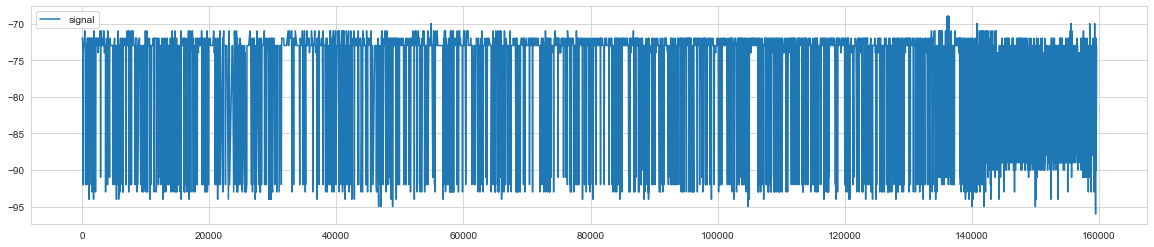

In [30]:
band_df[band_df['id'] == 'f5:88:ed:00:02:79'][['signal']].plot(figsize = (20, 4))

##### sleep index , sleep_time


In [6]:
# 대부분 0값
band_df['sl_idx'].value_counts()

0     438177
30       766
Name: sl_idx, dtype: int64

In [7]:
band_df['sl_time'].value_counts()

0     438177
35        86
45        85
50        83
25        78
40        77
30        76
70        69
55        66
75        57
60        41
65        35
80        13
Name: sl_time, dtype: int64

In [8]:
# sleep_time 에 따른 signal 평균
agg_ = ['mean', 'count']

band_df.groupby(by = 'sl_time').agg(agg_)['signal'] 

,mean,count
sl_time,,
0,-82.786134,438177
25,-70.064103,78
30,-70.500000,76
35,-70.558140,86
40,-70.415584,77
45,-70.411765,85
50,-70.096386,83
55,-70.500000,66
60,-70.243902,41


>- sleep time 데이터가 너무 0값에 몰려있음

In [9]:
band_df

,id,type,dt,bid,temp,hum,co2,voc,dust1,dust2_5,...,hr,walk,kcal,dist,sl_idx,sl_time,wear,st_idx,signal,hour
0,f5:88:ed:00:02:79,b,2020-07-21 00:02:40,24:0A:C4:4E:A9:10,29.6,61.4,485,96,14,14,...,0,0,0,0,0,0,1,71,-72,0
1,d3:dd:d3:5b:88:c2,b,2020-07-21 00:02:40,24:0A:C4:4E:A9:10,29.6,61.4,485,96,14,14,...,0,0,0,0,0,0,1,100,-62,0
2,e4:13:7d:7b:d7:0a,b,2020-07-21 00:02:40,24:0A:C4:4E:A9:10,29.6,61.4,485,96,14,14,...,0,0,0,0,0,0,1,0,-78,0
3,f5:c3:3a:11:23:17,b,2020-07-21 00:02:40,24:0A:C4:4E:A9:10,29.6,61.4,485,96,14,14,...,0,0,0,0,0,0,1,85,-63,0
4,e4:15:d7:13:40:01,b,2020-07-21 00:02:40,24:0A:C4:4E:A9:10,29.6,61.4,485,96,14,14,...,0,0,0,0,30,25,1,94,-70,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438938,dd:26:89:fb:6b:70,b,2020-07-22 00:02:42,24:0A:C4:4E:A9:10,29.9,58.6,736,93,10,10,...,0,0,0,0,0,0,1,0,-75,0
438939,d5:aa:2f:ea:b1:8a,b,2020-07-22 00:02:42,24:0A:C4:4E:A9:10,29.9,58.6,736,93,10,10,...,0,0,0,0,0,0,1,0,-90,0
438940,cb:d7:d9:4a:31:4f,b,2020-07-22 00:02:42,24:0A:C4:4E:A9:10,29.9,58.6,736,93,10,10,...,0,0,0,0,0,0,1,100,-76,0
438941,ec:50:2e:b5:cf:c4,b,2020-07-22 00:02:42,24:0A:C4:4E:A9:10,29.9,58.6,736,93,10,10,...,0,0,0,0,0,0,1,0,-71,0


##### 신호 세기와 변수별 상관성 파악

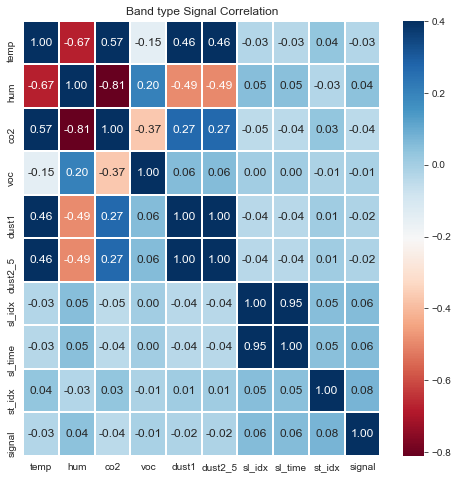

In [13]:
#상관분석에 활용될 변수 설정
cor_col = ['temp','hum','co2','voc','dust1','dust2_5', 'sl_idx', 'sl_time' , 'st_idx','signal']
colormap = plt.cm.RdBu 

plt.figure(figsize = (8,8))
sns.heatmap(band_df.loc[:,cor_col].corr(),
            linewidths = 1, vmax = 0.4,  cmap = colormap, fmt = '.2f',
            linecolor = "white", annot = True, annot_kws = {"size" : 12})
plt.title('Band type Signal Correlation' )
plt.show()

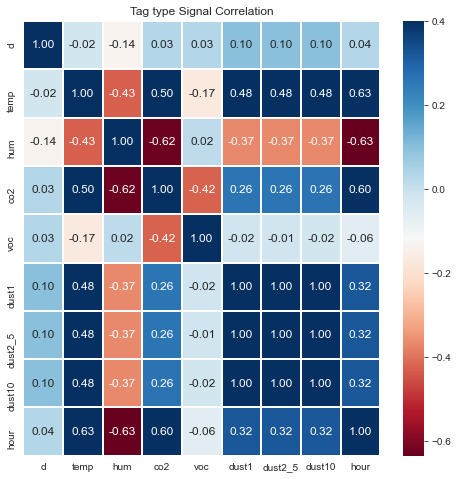

In [14]:
plt.figure(figsize = (8,8))
sns.heatmap(tag_df.loc[:, ['d','temp','hum','co2','voc','dust1','dust2_5','dust10','hour']].corr(),
            linewidths = 1, vmax = 0.4,  cmap = colormap, fmt = '.2f',
            linecolor = "white", annot = True, annot_kws = {"size" : 12})
plt.title('Tag type Signal Correlation')
plt.show()

##### band  데이터의 신호세기 시각화
- id 에 따른 신호세기를 시각화
- bid(게이트웨이)에 따라 신호세기 차이가 심해서 , bid별로 구분을 지어서 시각화하였음

In [15]:
display(band_df['id'].value_counts())

print('전체 id의 개수 : ', len(set(band_df['id'])))

ea:92:a1:d3:24:ed    59064
e6:d0:c1:9a:48:c5    50862
d3:dd:d3:5b:88:c2    43491
f5:c3:3a:11:23:17    41672
ec:50:2e:b5:cf:c4    31512
                     ...  
63:43:53:c2:40:c1        1
02:11:23:34:5b:9c        1
02:11:23:34:5b:6f        1
02:11:23:34:5b:97        1
02:11:23:34:5b:9b        1
Name: id, Length: 63, dtype: int64

전체 id의 개수 :  63


##### 63개의 id에 대해서 ,  bid(게이트웨이) 별로 시각화
- plot 하나당 한명의 데이터

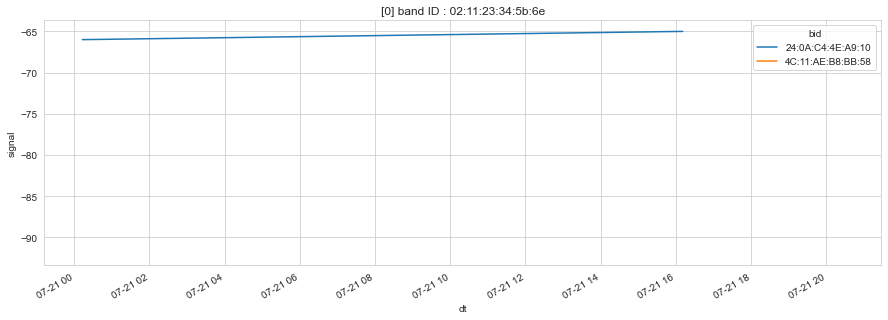

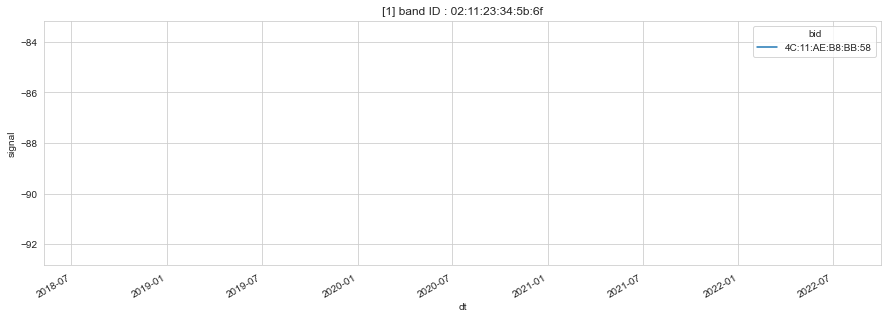

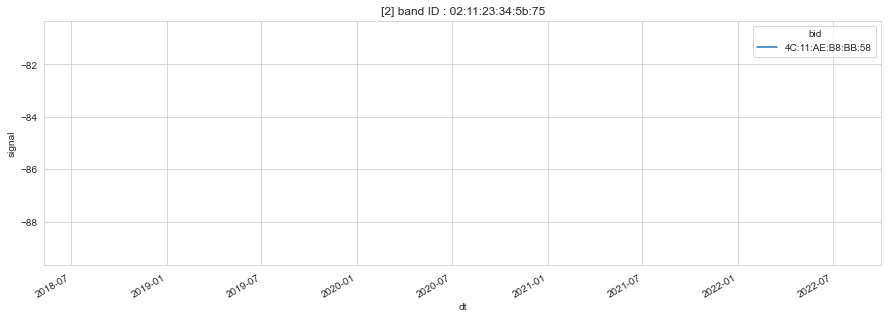

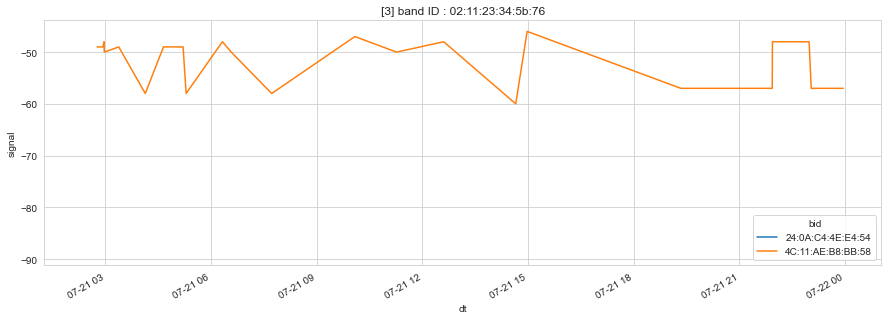

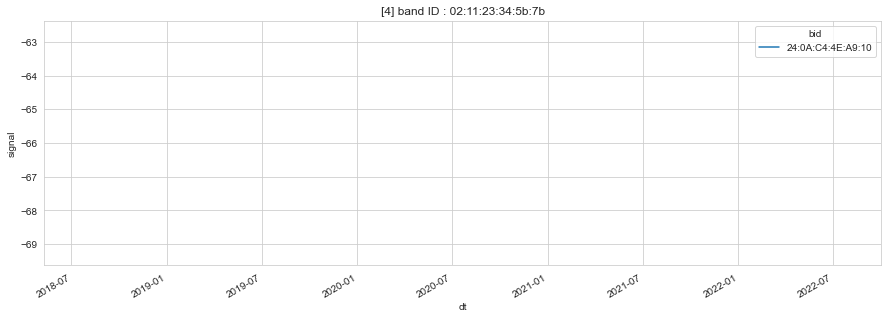

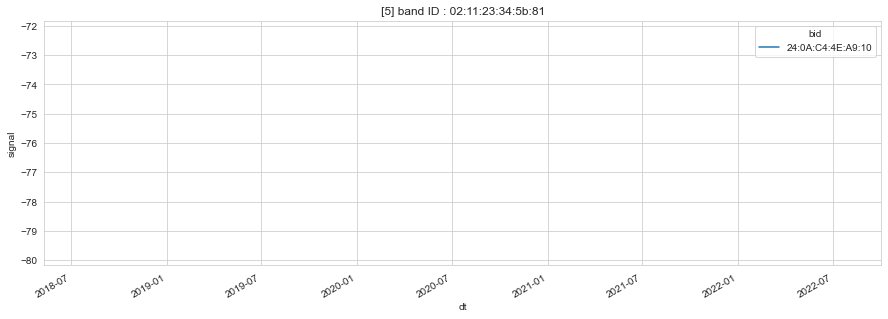

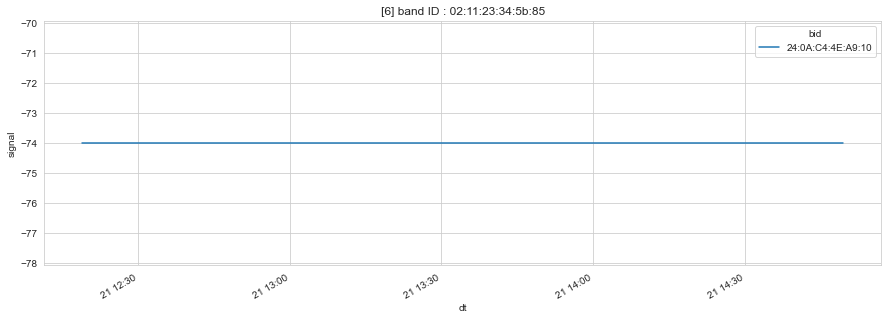

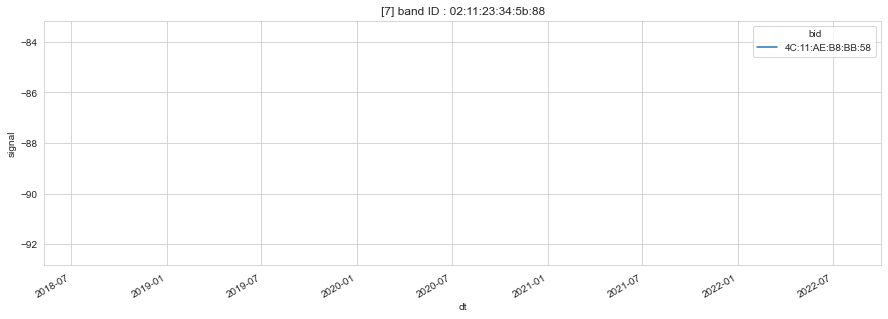

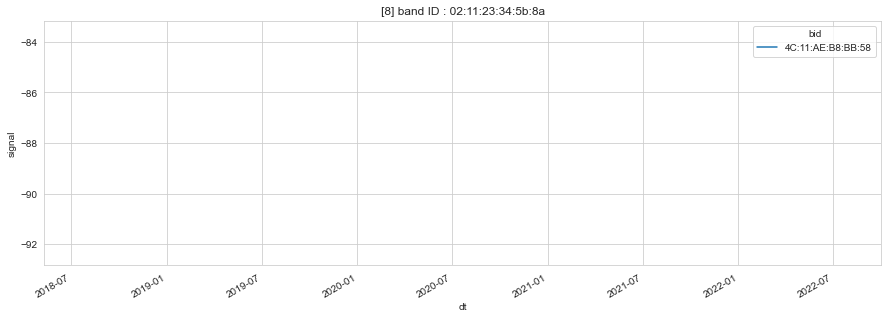

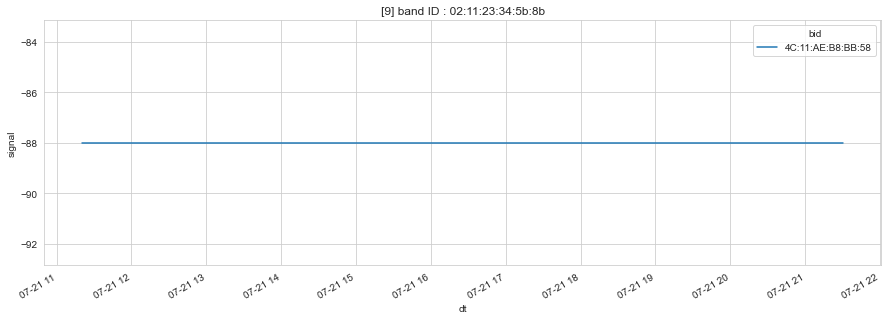

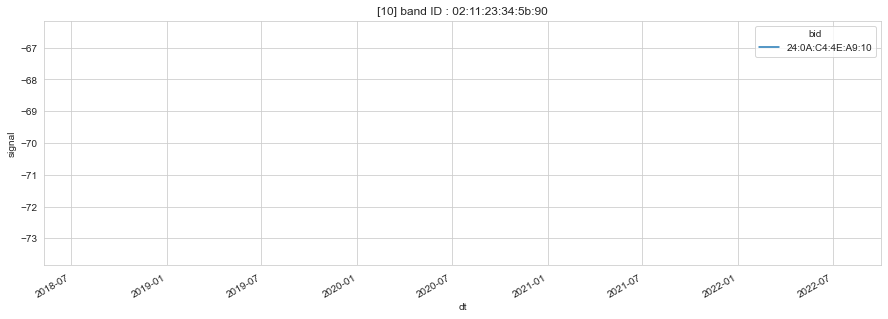

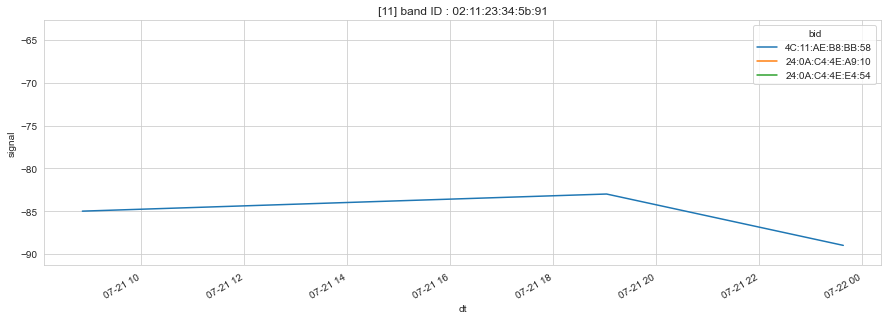

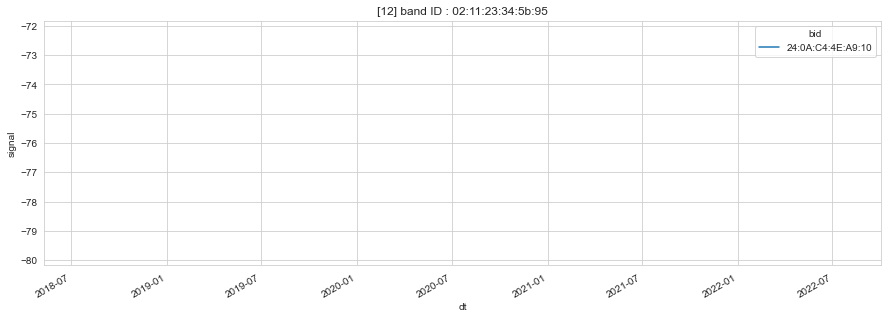

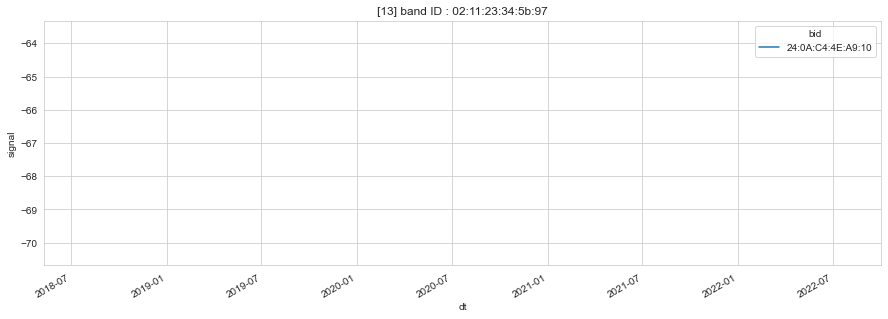

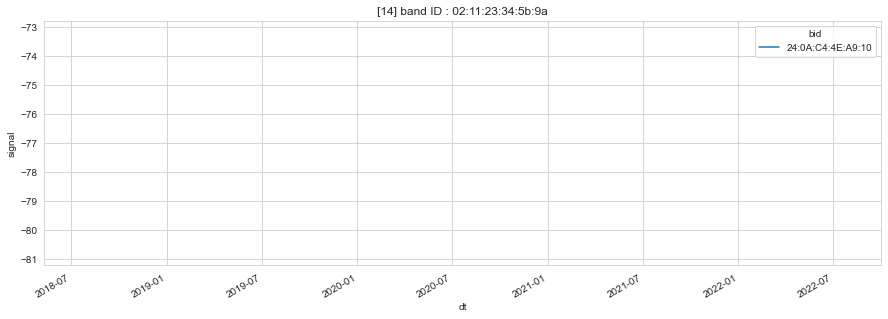

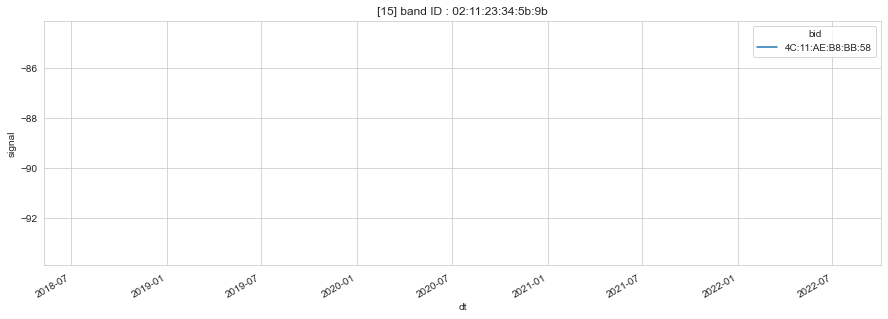

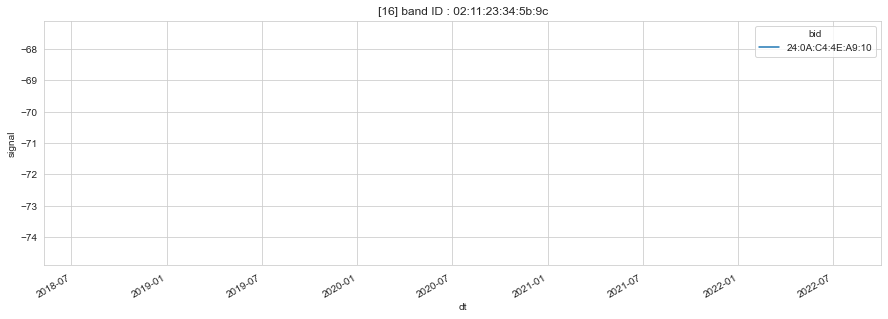

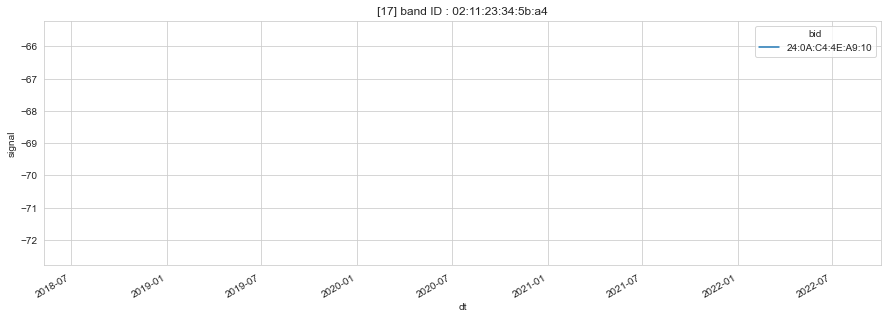

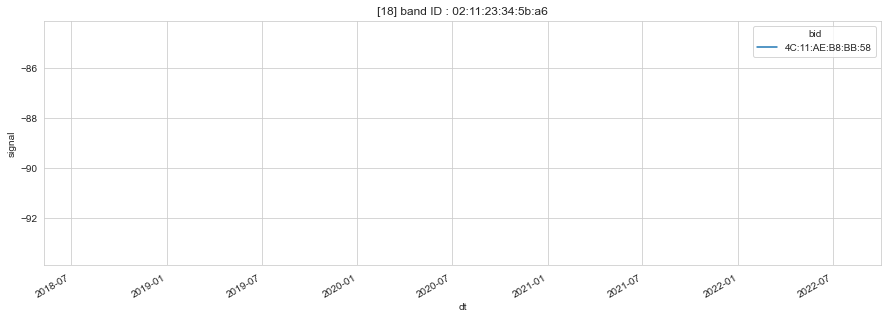

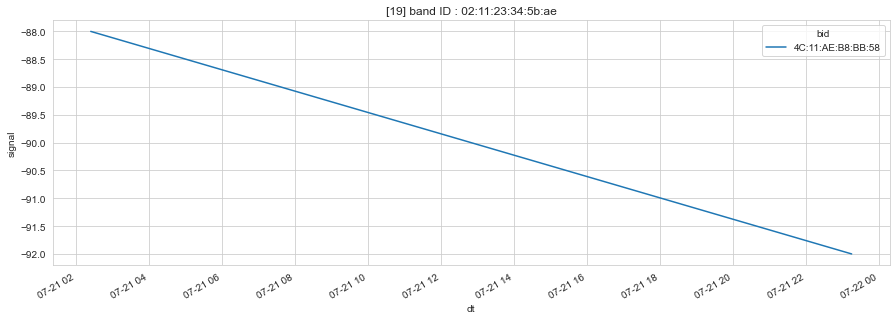

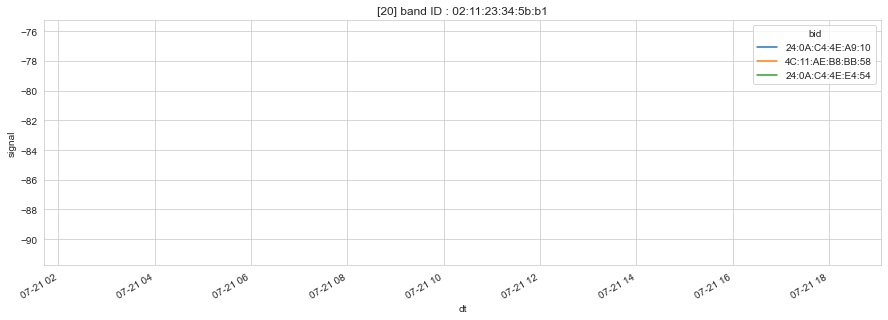

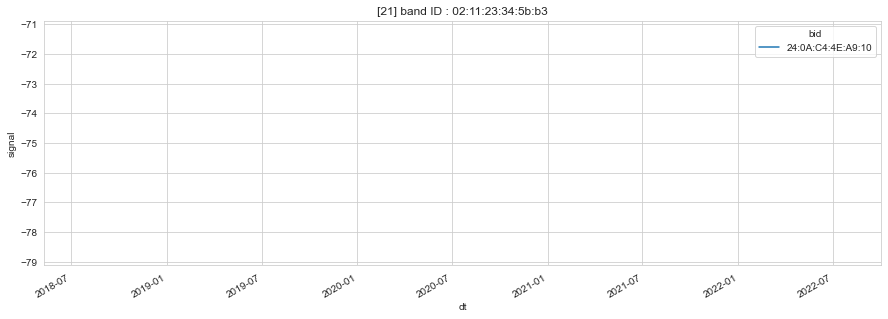

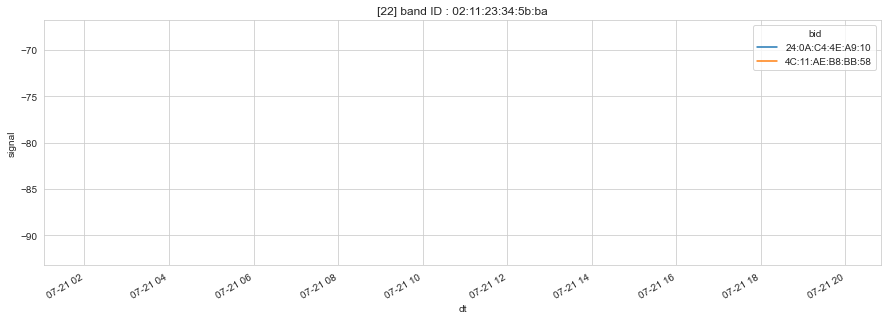

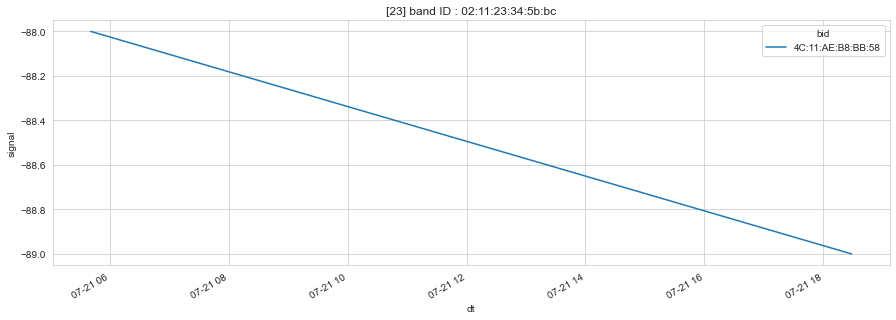

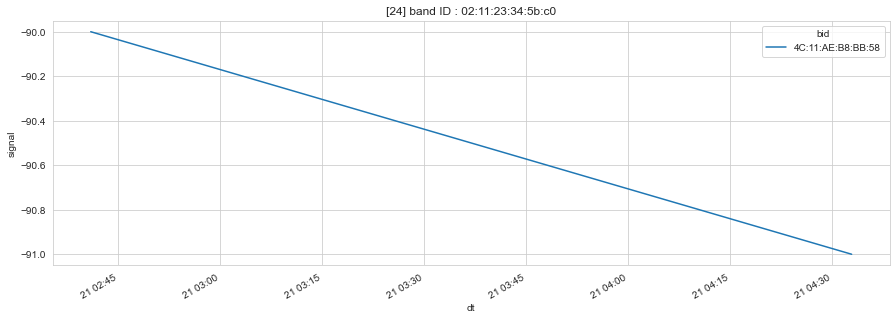

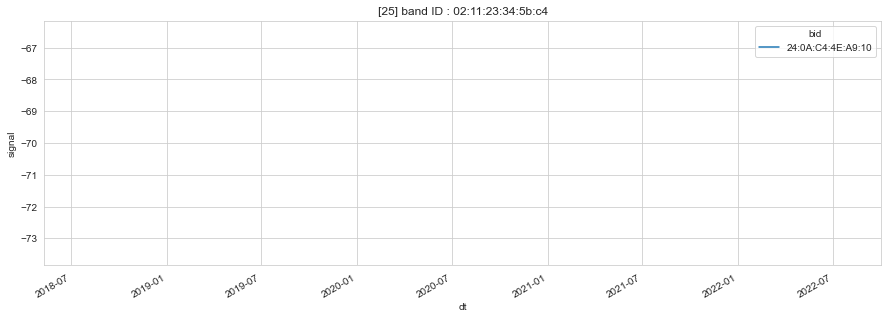

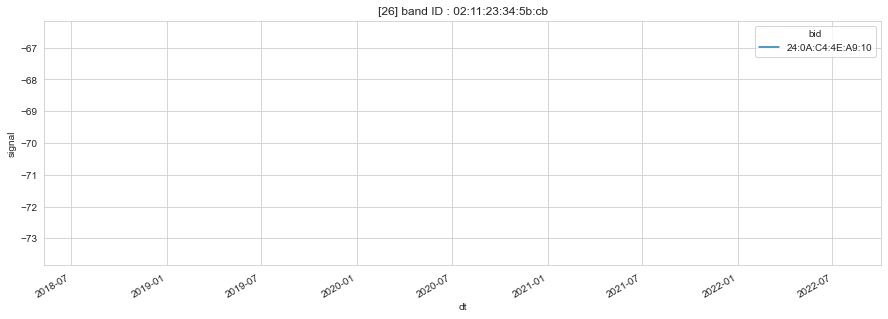

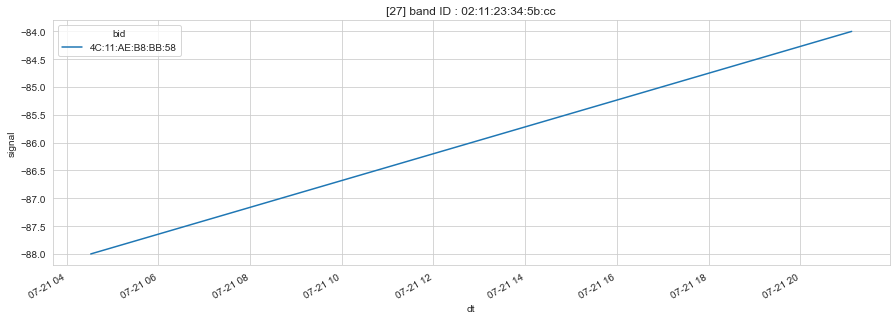

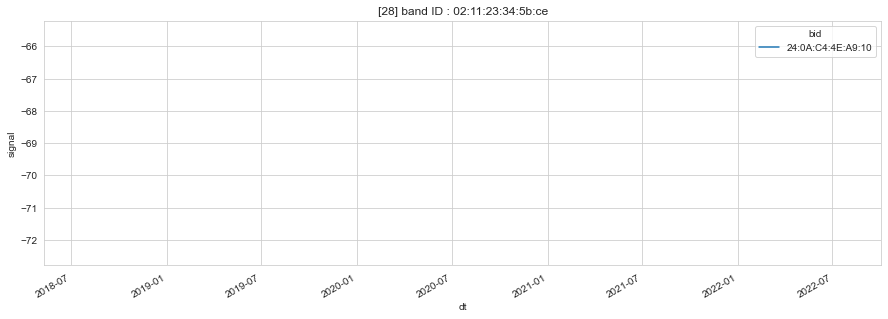

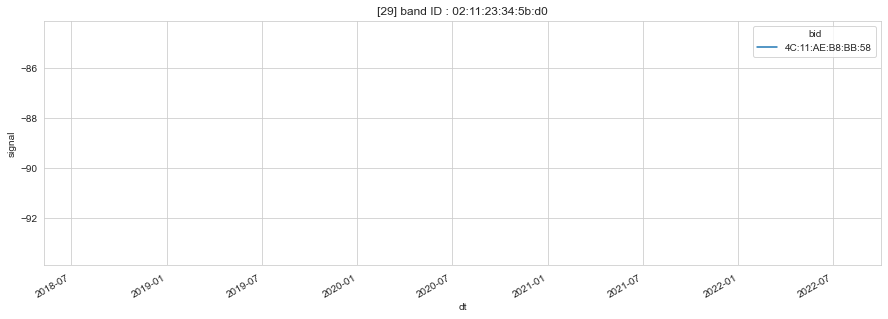

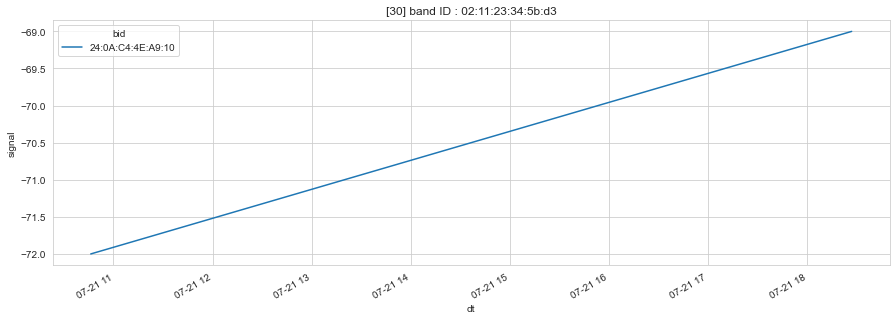

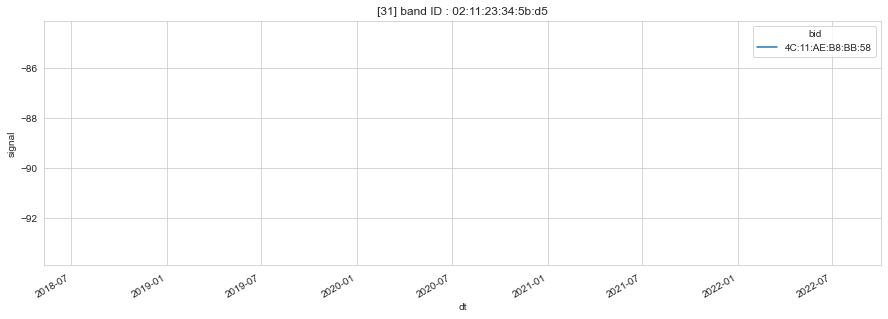

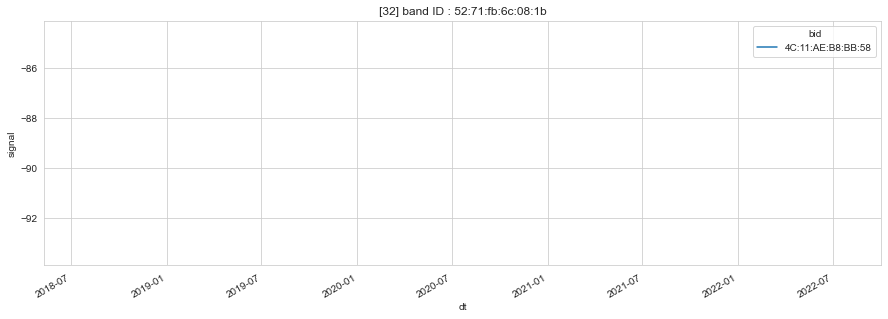

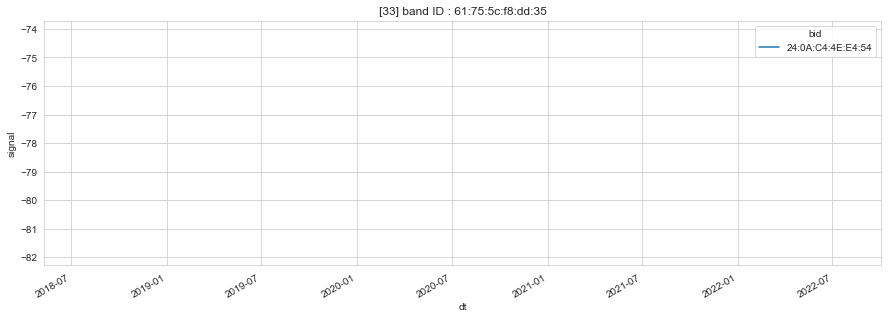

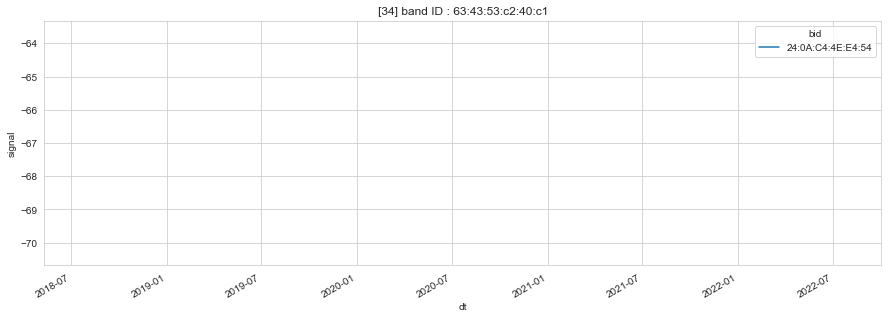

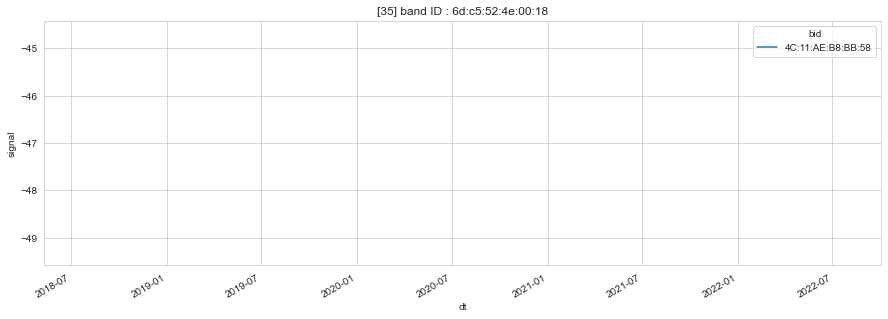

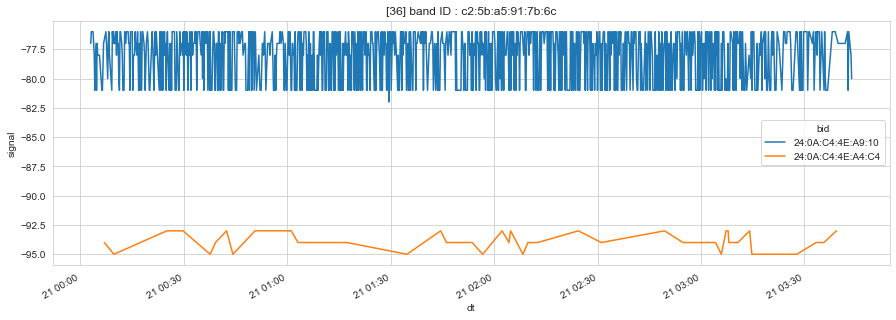

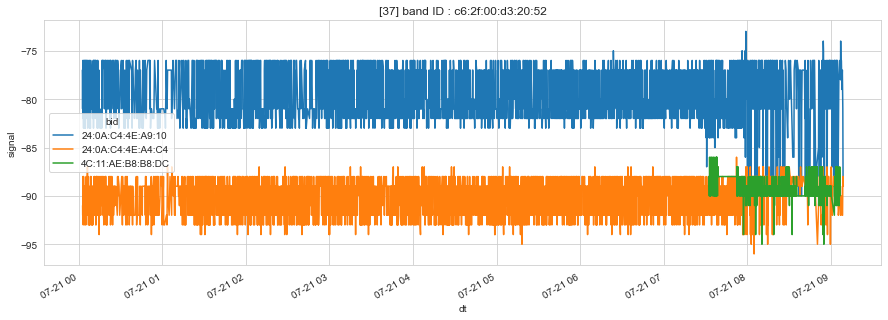

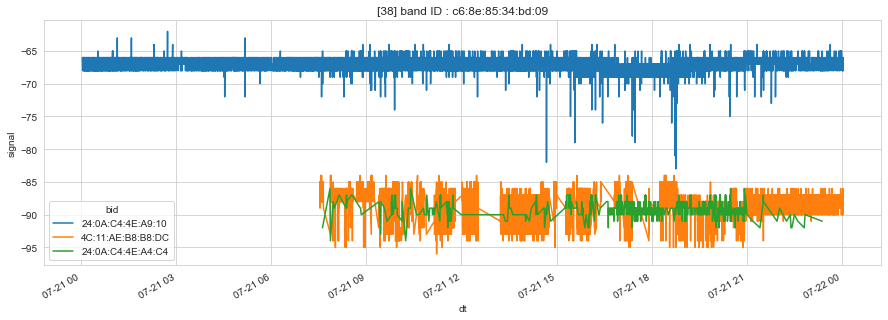

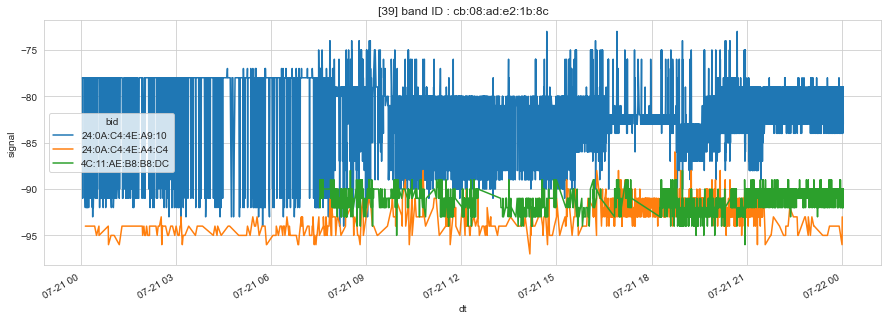

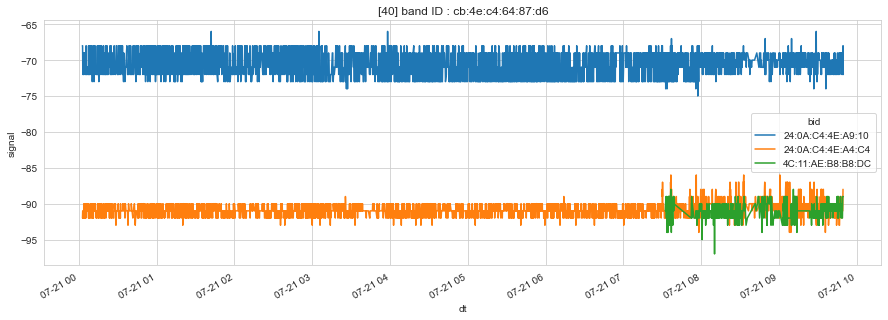

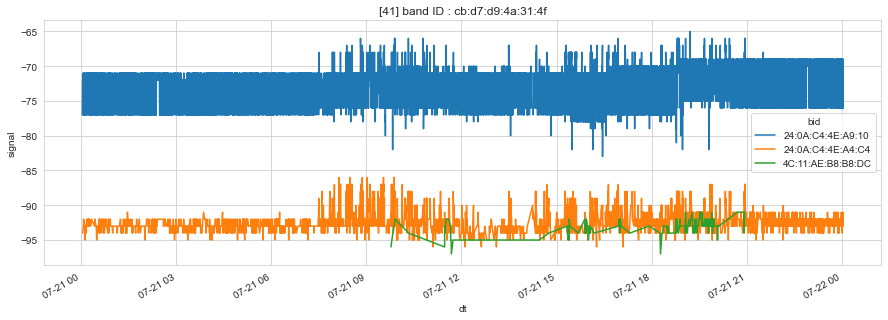

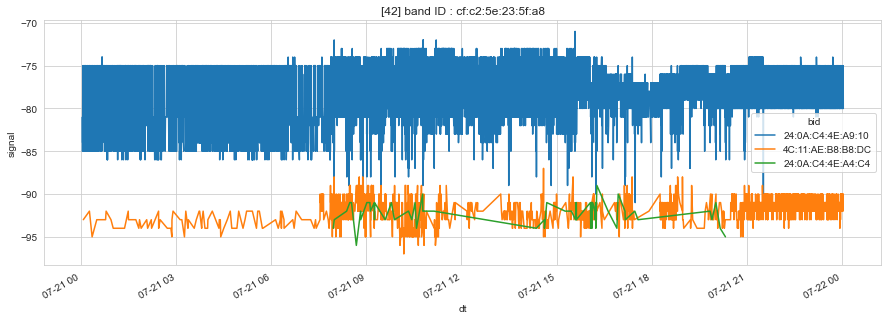

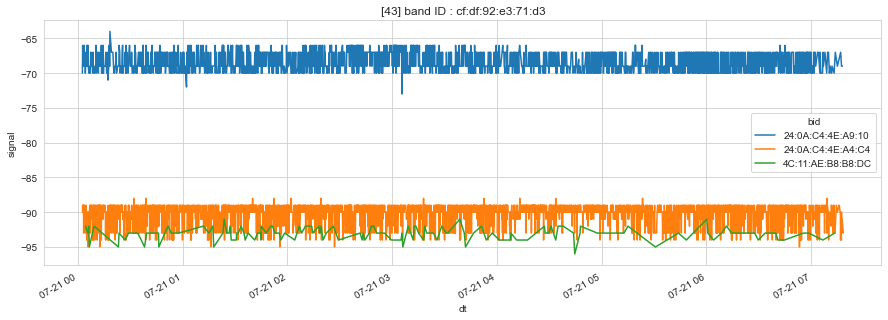

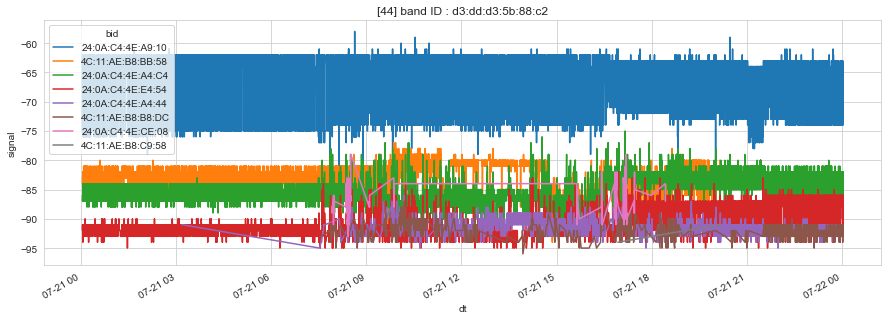

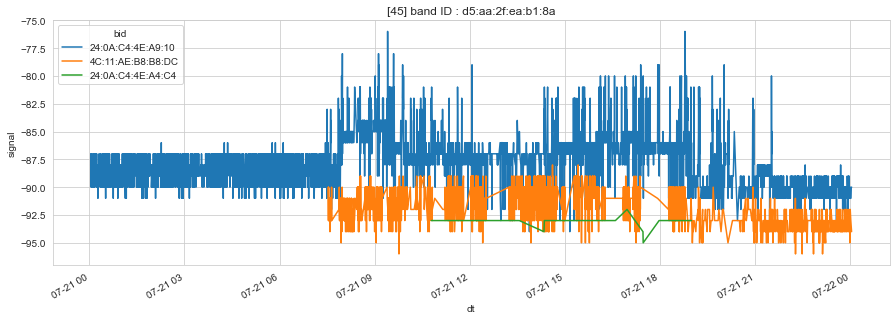

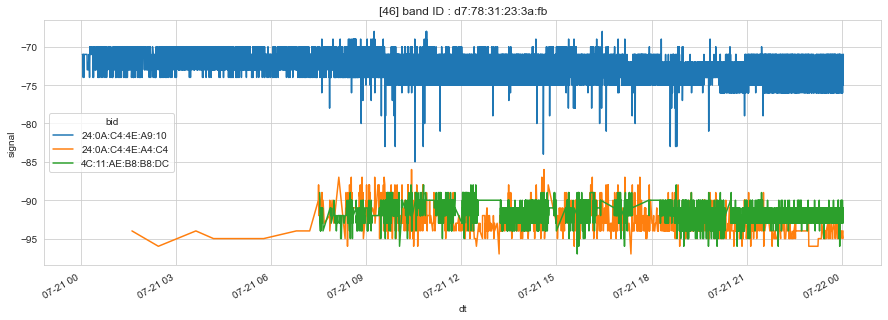

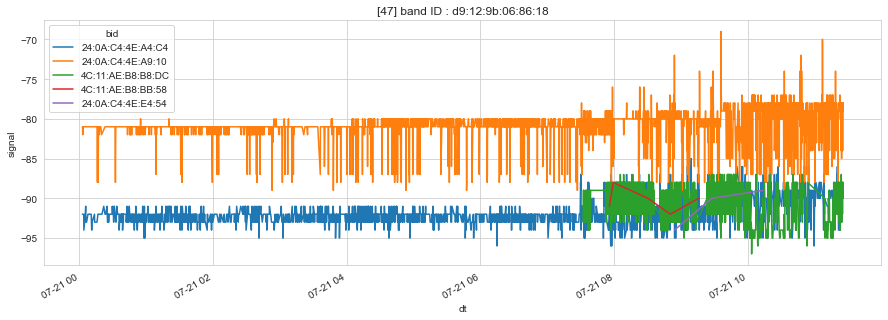

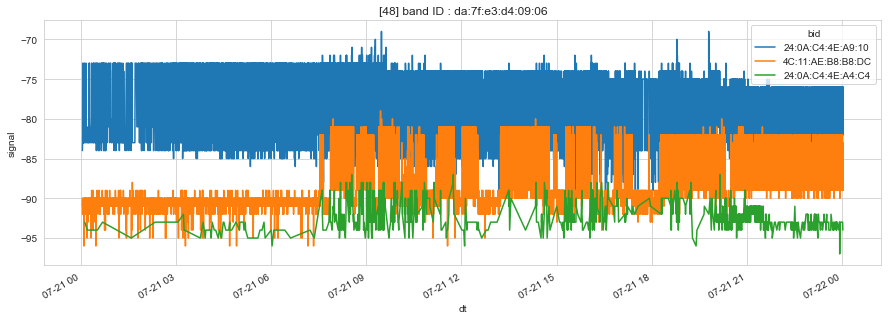

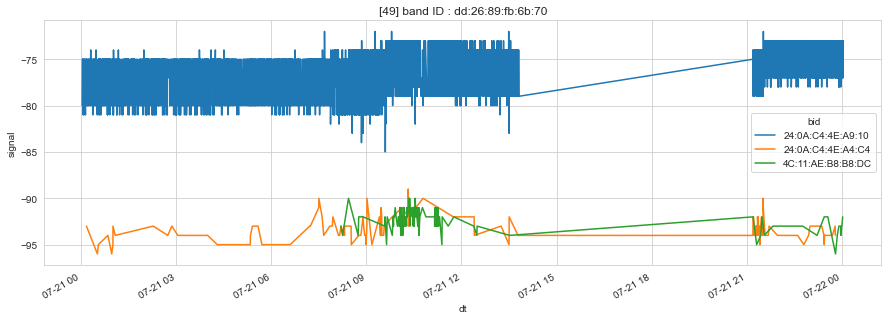

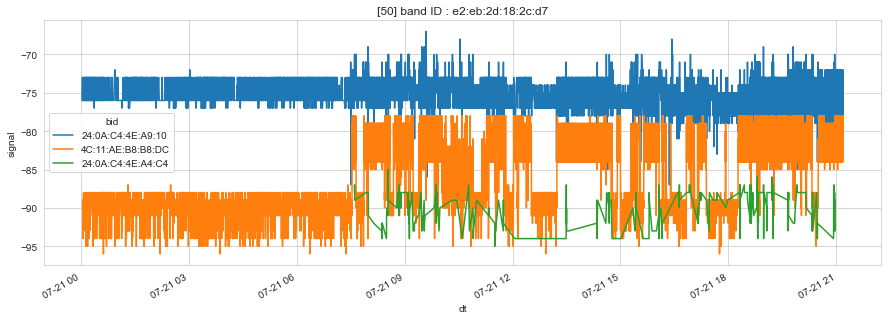

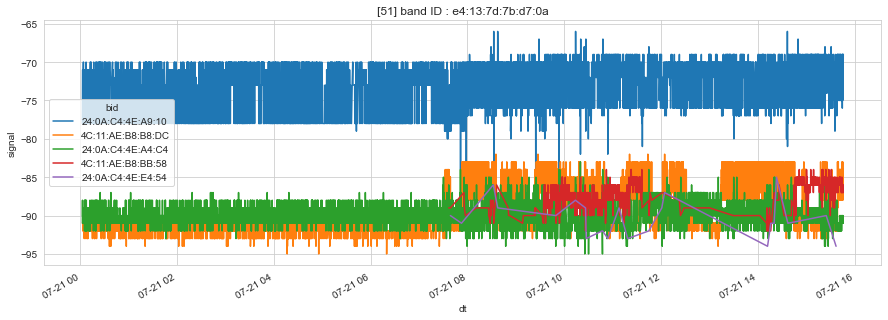

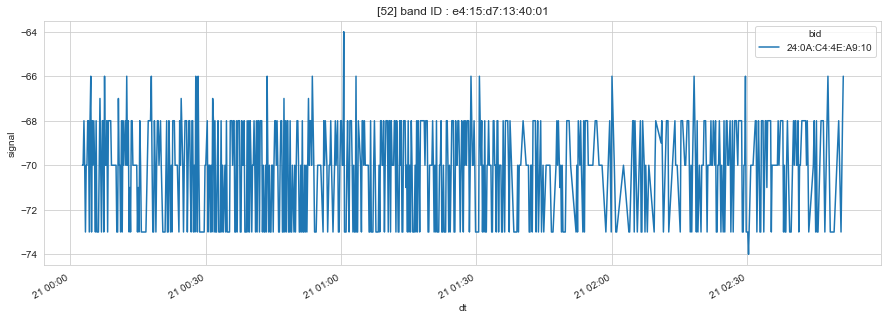

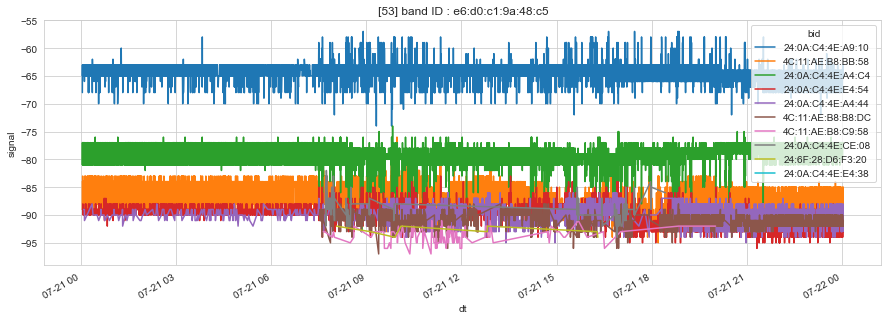

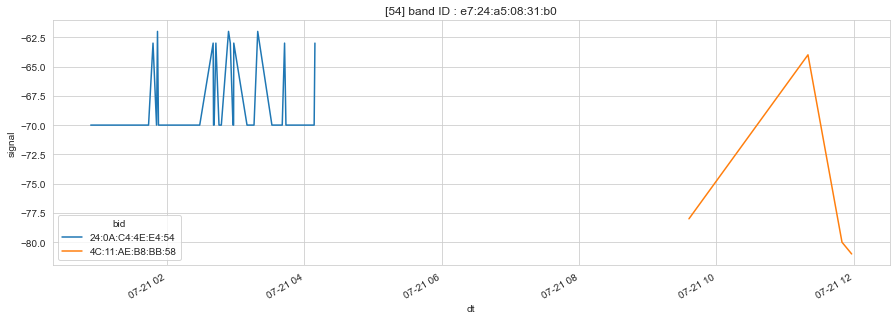

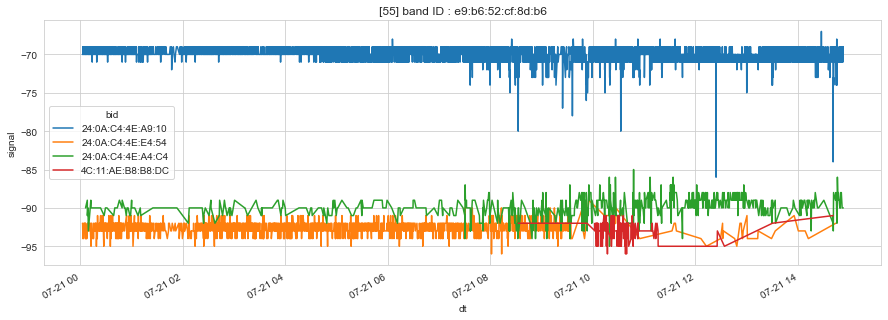

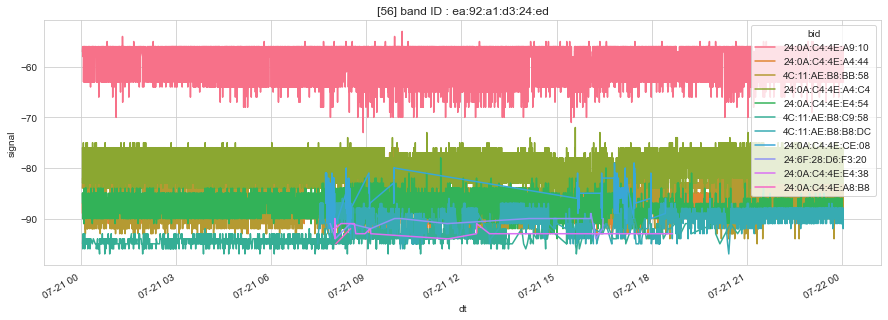

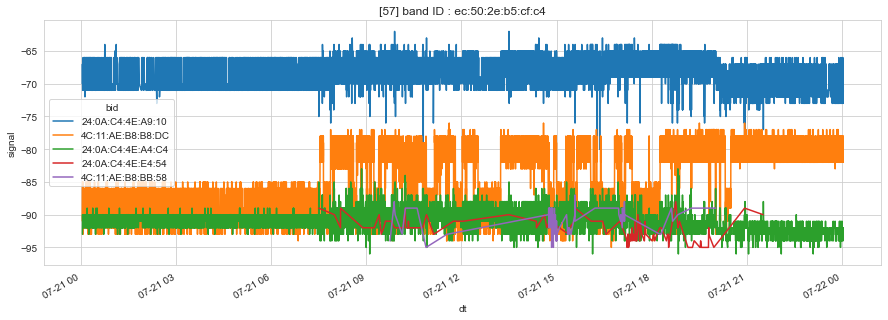

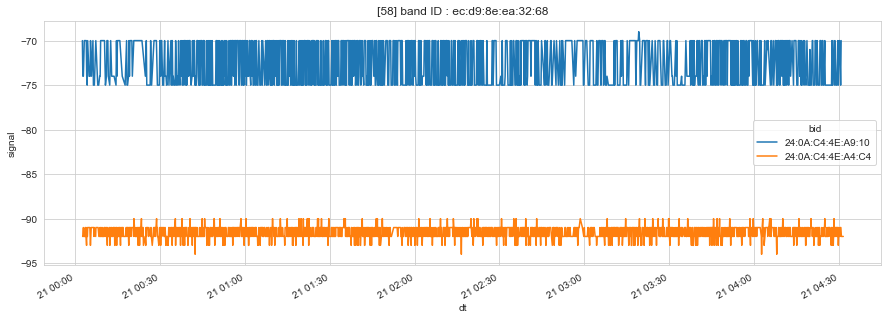

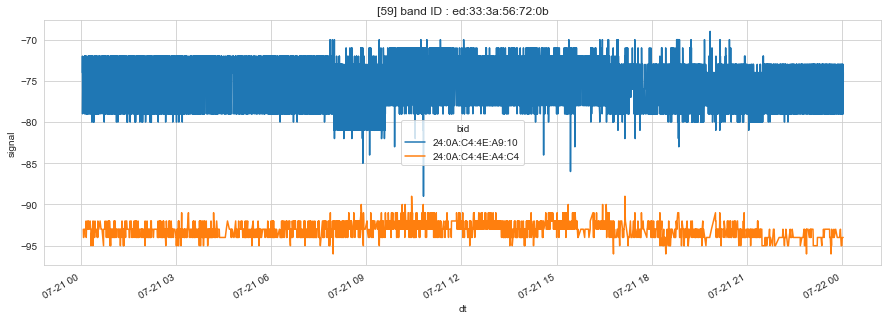

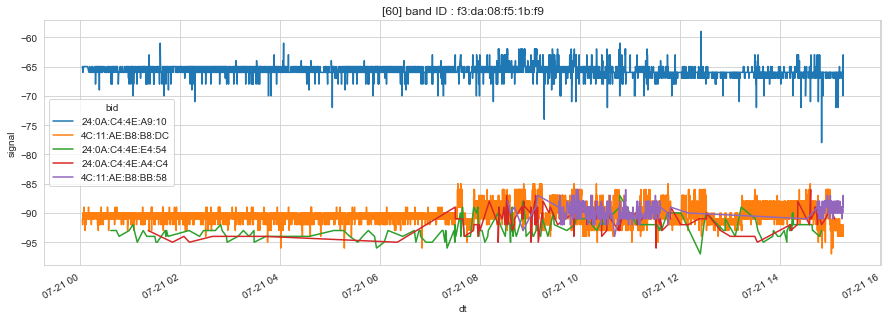

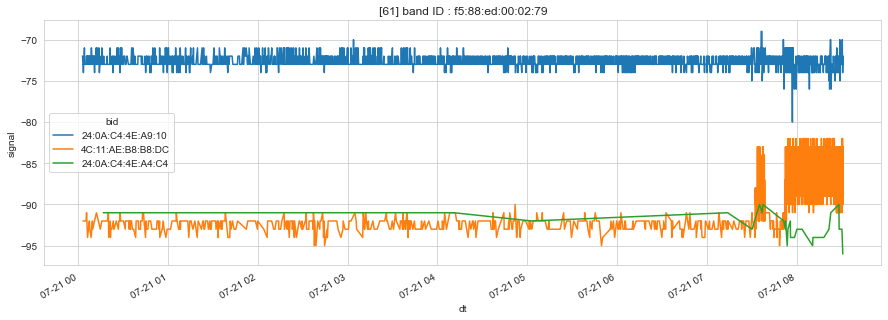

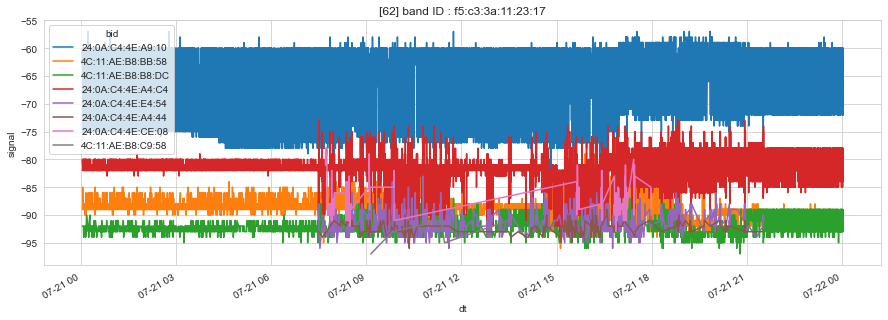

In [16]:
for index , id in enumerate(np.unique(band_df['id'])):
    plt.figure(figsize = (15,5))

    data = band_df[band_df['id']==id]

    sns.lineplot(x = 'dt',
                  y = 'signal',    
                  hue = 'bid',
                  data = data)

    plt.title('[' + str(index) +   '] band ID : ' + id)

    
    #시계열적 특성을 고려한 시각화에서 사용 => X축 시간에 맞게 auto format
    plt.gcf().autofmt_xdate()  

    plt.show()

##### 어린이마다의 신호세기 데이터 describe
- 63명의 어린이 데이터인데, 측정된 데이터 상당히 적은경우가 많이 존재

In [17]:
#어린이별 signal 
groupby_child_signal = band_df.groupby('id')['signal'].describe()

groupby_child_signal.sort_values(by = 'count', ascending = False) #count에 따른 오름차순 정렬

# id값이 "ea:92:a1:d3:24:ed" 인 아이가 가장 데이터가 많음

,count,mean,std,min,25%,50%,75%,max
id,,,,,,,,
ea:92:a1:d3:24:ed,59064.0,-82.270554,10.011744,-97.0,-89.0,-85.0,-80.0,-53.0
e6:d0:c1:9a:48:c5,50862.0,-82.825056,9.057258,-97.0,-90.0,-86.0,-78.0,-57.0
d3:dd:d3:5b:88:c2,43491.0,-83.372721,8.574128,-96.0,-90.0,-85.0,-82.0,-58.0
f5:c3:3a:11:23:17,41672.0,-82.889662,9.455989,-97.0,-90.0,-85.0,-81.0,-57.0
ec:50:2e:b5:cf:c4,31512.0,-82.413652,8.878964,-96.0,-91.0,-83.0,-78.0,-62.0
...,...,...,...,...,...,...,...,...
02:11:23:34:5b:b3,1.0,-75.000000,NaN,-75.0,-75.0,-75.0,-75.0,-75.0
6d:c5:52:4e:00:18,1.0,-47.000000,NaN,-47.0,-47.0,-47.0,-47.0,-47.0
02:11:23:34:5b:d0,1.0,-89.000000,NaN,-89.0,-89.0,-89.0,-89.0,-89.0


In [18]:
# count가 100 이상인 아이는 전체 63명중 26명뿐,, 데이터가 확실히 부족하다 느낌
a = groupby_child_signal[groupby_child_signal['count'] > 100]


print('count가 100 이상인 아이 수 : ' , len(a))

count가 100 이상인 아이 수 :  26


##### 가장 데이터가 많이 존재하는어린이인 [ea:92:a1:d3:24:ed] id값을 가진어린이의 게이트웨이별 밴드데이터 시각화
- 상당히 많은 게이트웨이에서 데이터가 받아와짐 (그만큼 활동이 많다는것을 짐작 가능)
- 특정 시간대에만 측정되는 게이트웨이도 존재

In [19]:
band_df[band_df['id'] =='ea:92:a1:d3:24:ed']

,id,type,dt,bid,temp,hum,co2,voc,dust1,dust2_5,...,hr,walk,kcal,dist,sl_idx,sl_time,wear,st_idx,signal,hour
16,ea:92:a1:d3:24:ed,b,2020-07-21 00:02:40,24:0A:C4:4E:A9:10,29.6,61.4,485,96,14,14,...,0,0,0,0,0,0,1,0,-57,0
22,ea:92:a1:d3:24:ed,b,2020-07-21 00:02:44,24:0A:C4:4E:A4:44,29.6,61.4,486,96,14,14,...,0,0,0,0,0,0,1,0,-87,0
23,ea:92:a1:d3:24:ed,b,2020-07-21 00:02:44,4C:11:AE:B8:BB:58,29.6,61.4,486,96,14,14,...,0,0,0,0,0,0,1,0,-84,0
34,ea:92:a1:d3:24:ed,b,2020-07-21 00:02:45,24:0A:C4:4E:A4:C4,29.6,61.2,484,96,13,13,...,0,0,0,0,0,0,1,0,-76,0
43,ea:92:a1:d3:24:ed,b,2020-07-21 00:02:46,24:0A:C4:4E:E4:54,29.6,61.4,486,96,14,14,...,0,0,0,0,0,0,1,0,-85,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438908,ea:92:a1:d3:24:ed,b,2020-07-22 00:02:38,4C:11:AE:B8:BB:58,29.9,58.6,736,95,9,9,...,0,0,0,0,0,0,1,0,-84,0
438917,ea:92:a1:d3:24:ed,b,2020-07-22 00:02:39,4C:11:AE:B8:B8:DC,29.9,58.6,737,95,9,9,...,0,0,0,0,0,0,1,0,-88,0
438922,ea:92:a1:d3:24:ed,b,2020-07-22 00:02:40,24:0A:C4:4E:A4:C4,29.9,58.6,736,93,10,10,...,0,0,0,0,0,0,1,0,-76,0
438927,ea:92:a1:d3:24:ed,b,2020-07-22 00:02:42,24:0A:C4:4E:E4:54,29.9,58.6,736,95,9,9,...,0,0,0,0,0,0,1,0,-90,0


<AxesSubplot:xlabel='dt', ylabel='signal'>

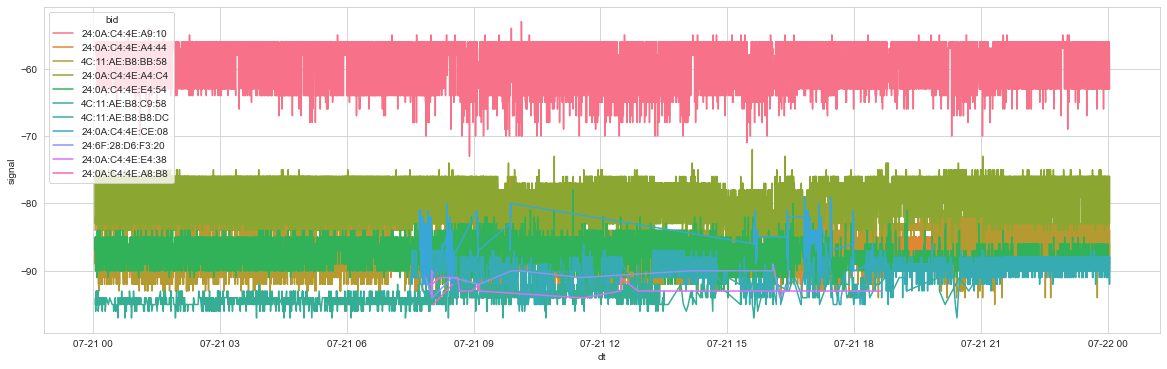

In [20]:
# 특정 id 대한 시각화
plt.figure(figsize = (20, 6))
sns.lineplot(x = 'dt',
              y = 'signal',    
              hue = 'bid',
              data = band_df[band_df['id'] =='ea:92:a1:d3:24:ed'])

# 게이트웨이별로 신호세기 데이터 describe
- 특정 게이트웨이에서 신호가 상당히 많이잡히며, 그때 평균 신호세기는 낮음

In [21]:
band_df.groupby('bid')['signal'].describe().sort_values('count', ascending = False)

,count,mean,std,min,25%,50%,75%,max
bid,,,,,,,,
24:0A:C4:4E:A9:10,135300.0,-72.209091,7.338197,-94.0,-77.00,-72.0,-67.00,-53.0
4C:11:AE:B8:B8:DC,113321.0,-88.479046,3.994618,-97.0,-91.00,-90.0,-87.00,-76.0
24:0A:C4:4E:A4:C4,99450.0,-86.035726,5.522768,-97.0,-91.00,-87.0,-81.00,-72.0
4C:11:AE:B8:BB:58,42960.0,-85.561103,3.342286,-96.0,-88.00,-85.0,-83.00,-46.0
24:0A:C4:4E:E4:54,27753.0,-89.666018,2.594657,-97.0,-92.00,-90.0,-88.00,-62.0
24:0A:C4:4E:A4:44,15915.0,-89.328369,2.101334,-96.0,-91.00,-89.0,-88.00,-83.0
4C:11:AE:B8:C9:58,3154.0,-93.664870,1.248503,-97.0,-94.00,-94.0,-93.00,-88.0
24:0A:C4:4E:CE:08,1042.0,-86.795585,3.021133,-94.0,-89.00,-87.0,-85.00,-78.0
24:0A:C4:4E:E4:38,24.0,-92.250000,1.113162,-94.0,-93.00,-92.0,-91.00,-90.0


In [22]:
# 전체 게이트웨이는 10개인듯?
list(set(band_df['bid']))

['24:6F:28:D6:F3:20',
 '4C:11:AE:B8:BB:58',
 '24:0A:C4:4E:A4:C4',
 '24:0A:C4:4E:A9:10',
 '24:0A:C4:4E:A8:B8',
 '24:0A:C4:4E:E4:54',
 '24:0A:C4:4E:E4:38',
 '4C:11:AE:B8:C9:58',
 '4C:11:AE:B8:B8:DC',
 '24:0A:C4:4E:A4:44',
 '24:0A:C4:4E:CE:08']

##### 10개의 게이트웨이에 대해 시간대별  수신 count 시각화

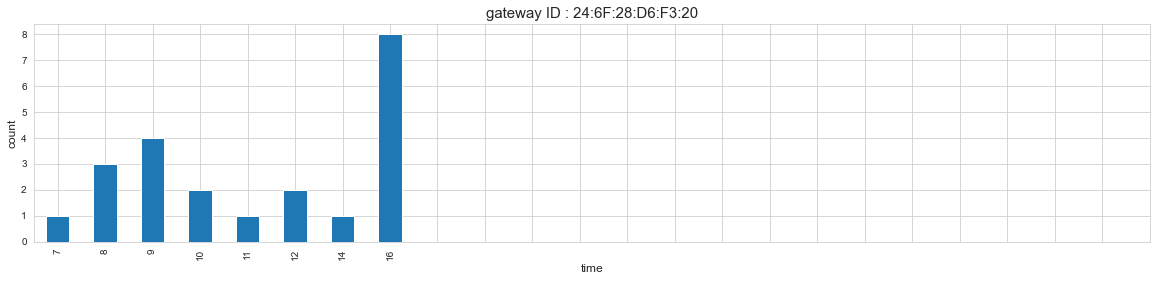

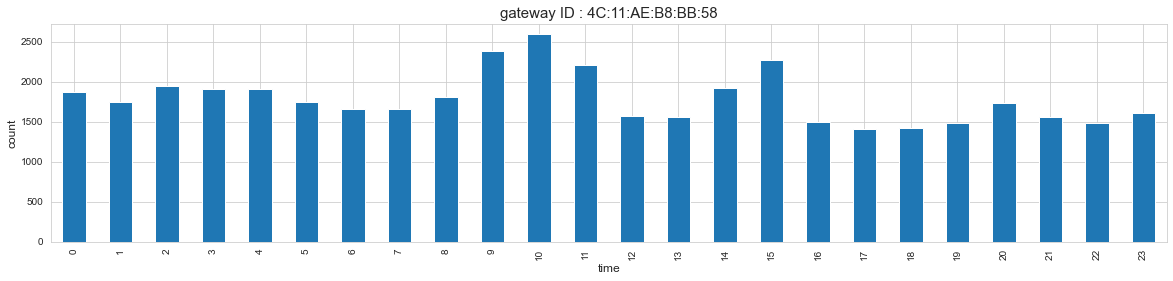

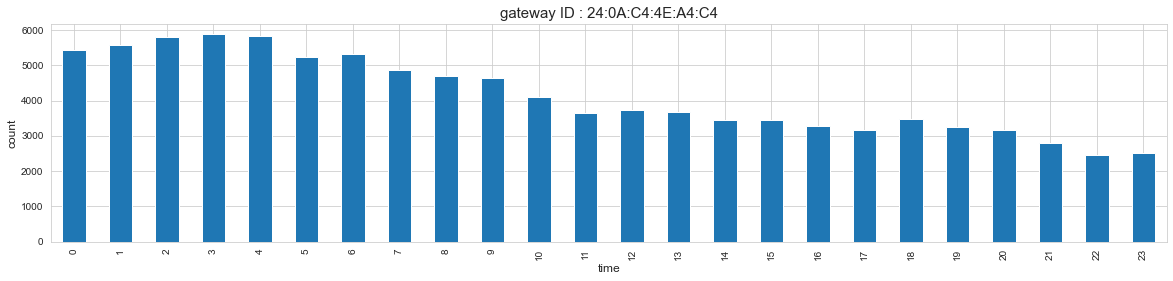

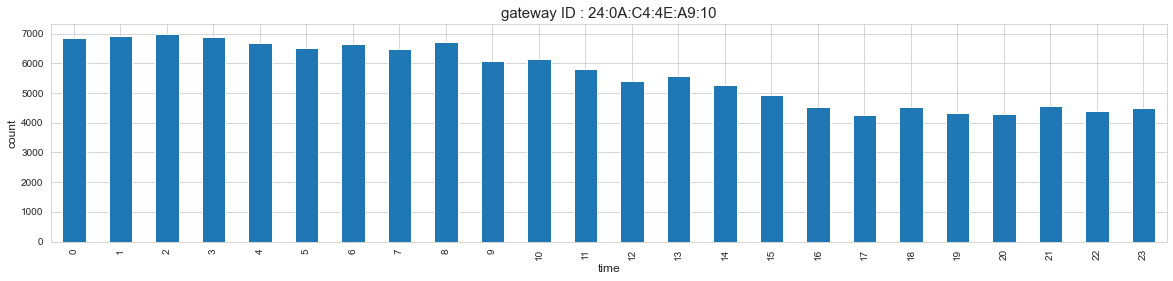

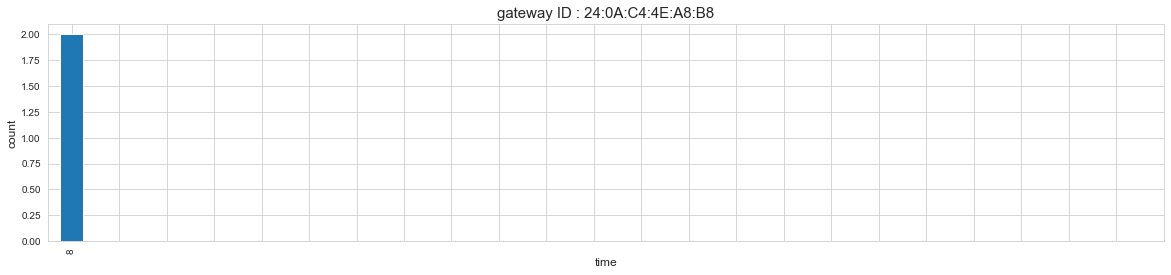

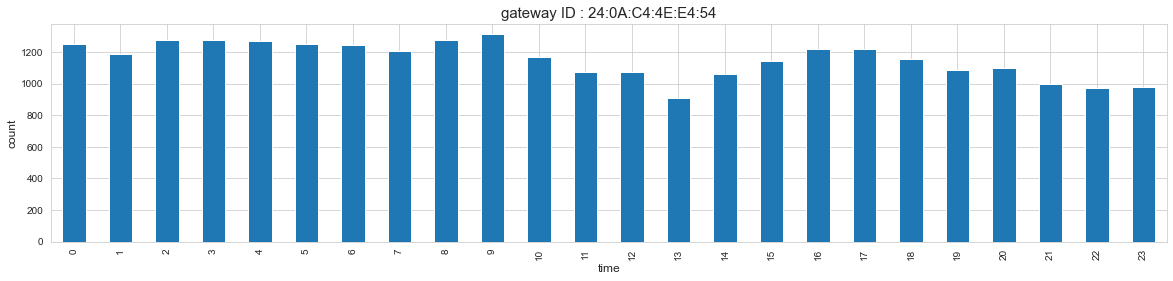

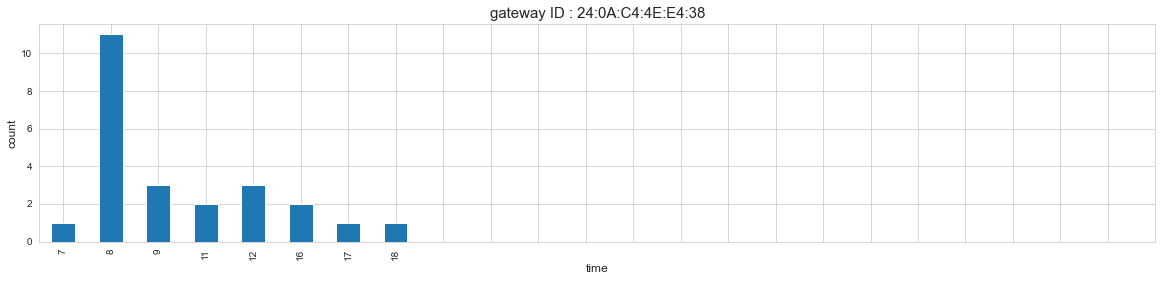

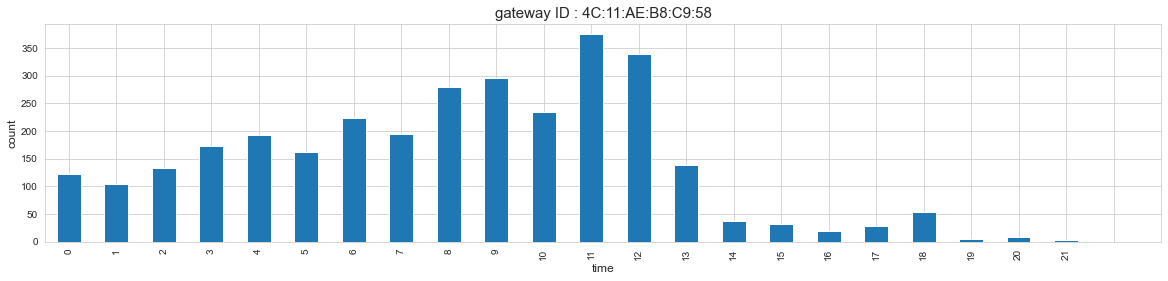

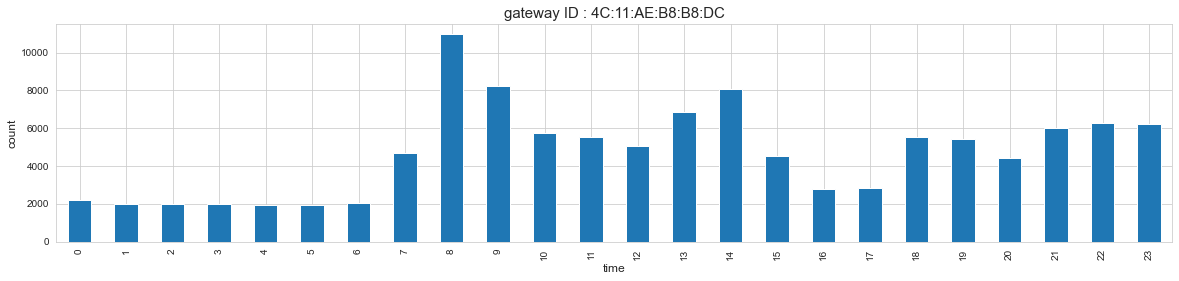

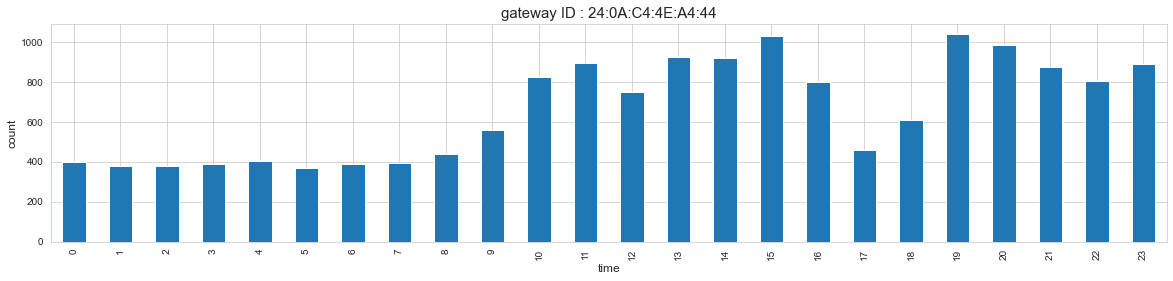

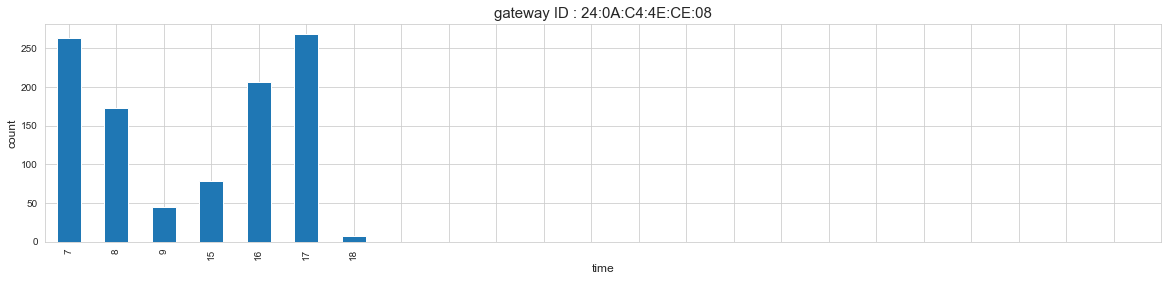

In [23]:
for gateway in list(set(band_df['bid'])):
    
    band_df[band_df['bid'] == gateway]['dt'].apply(lambda x : x.hour).value_counts().sort_index().\
                plot(kind = 'bar', figsize = (20, 4))
    
    plt.title('gateway ID : ' + gateway, fontsize = 15)
    plt.xticks(range(0, 24))
    plt.xlabel('time', fontsize = 12)
    plt.ylabel('count',fontsize = 12)
    
    plt.show()

#####  위의 그래프들을 통해 특정 시간대에만 나타나는 gateway 존재함을 볼 수 있다.
>- but, 새벽까지도 측정되는 게이트웨이도 많이 존재하며, 새벽에 더 신호세기가 높은 경우도 존재?
>- 5번째 그래프의 게이트웨이에서는 신호가 거의 측정되지 않음을 볼 수 있다.

##### tag_df EDA

In [41]:
tag_df.tail(5)

,id,type,d,dt,bid,temp,hum,co2,voc,dust1,dust2_5,dust10,hour
1621199,02:11:23:34:5b:85,t,-80,2020-07-22 00:02:42,24:0A:C4:4E:A9:10,29.9,58.6,736,93,10,10,10,0
1621200,02:11:23:34:5b:39,t,-67,2020-07-22 00:02:42,24:0A:C4:4E:A9:10,29.9,58.6,736,93,10,10,10,0
1621201,02:11:23:34:5b:cc,t,-68,2020-07-22 00:02:42,24:0A:C4:4E:A9:10,29.9,58.6,736,93,10,10,10,0
1621202,02:11:23:34:5b:b7,t,-69,2020-07-22 00:02:42,24:0A:C4:4E:A9:10,29.9,58.6,736,93,10,10,10,0
1621203,dd:34:01:02:f9:3e,t,-93,2020-07-22 00:02:43,24:0A:C4:4E:A8:B8,29.9,58.6,736,95,9,9,9,0


In [58]:
# type == t 를 갖는 id들에 대한 분포

groupby_id_tag_distribute = tag_df.groupby('id')['d'].describe()

groupby_id_tag_distribute.sort_values(by = 'count', ascending = False)

,count,mean,std,min,25%,50%,75%,max
id,,,,,,,,
dd:34:01:02:fe:8d,65402.0,-79.673190,14.138544,-97.0,-90.0,-87.0,-75.0,-46.0
dd:34:01:02:f9:3e,56169.0,-80.842030,9.955006,-97.0,-89.0,-85.0,-75.0,-57.0
02:11:23:34:5b:76,56055.0,-83.374061,7.589255,-96.0,-89.0,-84.0,-79.0,-44.0
dd:34:01:02:c8:e7,39559.0,-77.140575,13.077527,-96.0,-88.0,-81.0,-72.0,-50.0
02:11:23:34:5b:91,31389.0,-84.605849,7.660644,-96.0,-91.0,-86.0,-80.0,-60.0
...,...,...,...,...,...,...,...,...
c9:db:ae:eb:a9:21,1.0,-84.000000,NaN,-84.0,-84.0,-84.0,-84.0,-84.0
d8:30:e6:42:08:f5,1.0,-86.000000,NaN,-86.0,-86.0,-86.0,-86.0,-86.0
db:9a:ef:d5:61:3c,1.0,-84.000000,NaN,-84.0,-84.0,-84.0,-84.0,-84.0


In [61]:
# 측정된 데이터의 수가 10 이하인 개수는 전체 174개 중 , 54개
len(groupby_id_tag_distribute[groupby_id_tag_distribute['count'] < 10])

54

In [39]:
# 15개의 gateway에서 받아지는 tag 데이터 신호 분포

tag_df.groupby('bid')['d'].agg(['count','mean','std']).sort_values(by = 'count')

,count,mean,std
bid,,,
24:0A:C4:4E:CE:08,4383,-57.350217,14.285504
C4:4F:33:25:EE:BD,14565,-89.090148,2.864665
24:0A:C4:4E:A8:B8,39293,-79.616878,11.049769
24:6F:28:D6:F3:20,43736,-78.530547,12.397934
4C:11:AE:B8:85:F4,47319,-76.349310,12.358794
24:0A:C4:4E:E4:38,59463,-77.188840,12.045858
24:6F:28:D6:F3:5C,65553,-72.243848,11.829554
24:0A:C4:4E:A7:60,67940,-73.766765,9.225186
24:0A:C4:4E:E4:54,71300,-83.257349,9.933295
